In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [2]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = './content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = './content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [3]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [4]:
#CNN model
model = Sequential()

model.add(Conv2D(32,
                 kernel_size=(3,3),
                 padding='valid',
                 activation='relu',
                 input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),
                       strides=2,
                       padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),
                 padding='valid',
                 activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),
                       strides=2,
                       padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),
                 padding='valid',
                 activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),
                       strides=2,
                       padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 254, 254, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 125, 125, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 128)       7

In [6]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [7]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 141s 183ms/step - loss: 1.2996 - accuracy: 0.5911 - val_loss: 0.6469 - val_accuracy: 0.6414
Epoch 2/10
625/625 [==============================] - 113s 180ms/step - loss: 0.5782 - accuracy: 0.7056 - val_loss: 0.5303 - val_accuracy: 0.7328
Epoch 3/10
625/625 [==============================] - 115s 184ms/step - loss: 0.4774 - accuracy: 0.7725 - val_loss: 0.4893 - val_accuracy: 0.7664
Epoch 4/10
625/625 [==============================] - 119s 190ms/step - loss: 0.4239 - accuracy: 0.8053 - val_loss: 0.4848 - val_accuracy: 0.7724
Epoch 5/10
625/625 [==============================] - 137s 219ms/step - loss: 0.3648 - accuracy: 0.8414 - val_loss: 0.4685 - val_accuracy: 0.7950
Epoch 6/10
625/625 [==============================] - 131s 209ms/step - loss: 0.2961 - accuracy: 0.8722 - val_loss: 0.8103 - val_accuracy: 0.7544
Epoch 7/10
625/625 [==============================] - 120s 192ms/step - loss: 0.2110 - accuracy: 0.9125 - val_loss: 0.5896 -

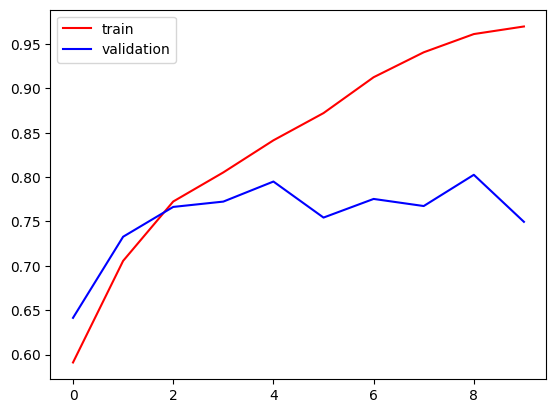

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

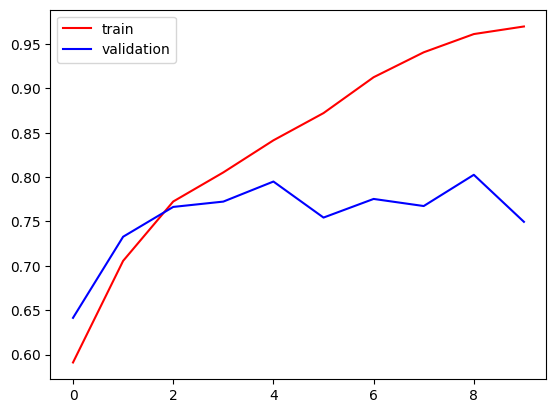

In [15]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
#reduce overfitting

In [16]:
import cv2

In [36]:
test_img = cv2.imread('./content/dog.jpg')

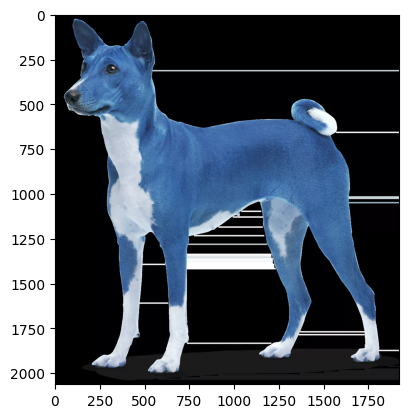

In [37]:
plt.imshow(test_img)

In [38]:
test_img.shape

(2063, 1920, 3)

In [39]:
test_img = cv2.resize(test_img,
                      (256,256))

In [40]:
test_input = test_img.reshape((1,256,256,3))

In [41]:
model.predict(test_input)

array([[1.]], dtype=float32)

In [43]:
test_img1 = cv2.imread('./content/cat.jpg')

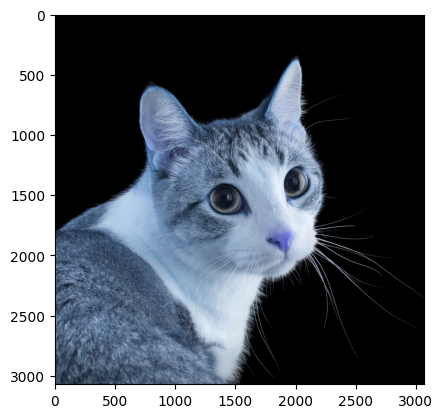

In [44]:
plt.imshow(test_img1)

In [45]:
test_img1.shape

(3072, 3072, 3)

In [46]:
test_img1 = cv2.resize(test_img1,
                      (256,256))

In [47]:
test_input1 = test_img1.reshape((1,256,256,3))

In [48]:
model.predict(test_input1)

array([[0.]], dtype=float32)